In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
data_dir = pathlib.Path("/root/ML-final-assignment/CNN/images/")

In [18]:
batch_size = 64
img_height = 125
img_width = 125
validation_split = 0.2

In [20]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split = validation_split,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split = validation_split,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
num_classes = len(class_names)



Found 997 files belonging to 2 classes.
Using 798 files for training.
Found 997 files belonging to 2 classes.
Using 199 files for validation.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [48]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.5),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(factor=0.2)
  ]
)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dropout(0.3),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
##model.summary()

Epoch 1/200
13/13 [==============================] - 3s 145ms/step - loss: 0.7072 - accuracy: 0.5288 - val_loss: 0.7001 - val_accuracy: 0.5578
Epoch 2/200
13/13 [==============================] - 2s 135ms/step - loss: 0.6793 - accuracy: 0.5877 - val_loss: 0.6964 - val_accuracy: 0.5578
Epoch 3/200
13/13 [==============================] - 2s 135ms/step - loss: 0.6765 - accuracy: 0.5877 - val_loss: 0.6976 - val_accuracy: 0.5578
Epoch 4/200
13/13 [==============================] - 2s 133ms/step - loss: 0.6751 - accuracy: 0.5877 - val_loss: 0.6898 - val_accuracy: 0.5578
Epoch 5/200
13/13 [==============================] - 2s 134ms/step - loss: 0.6684 - accuracy: 0.5877 - val_loss: 0.7044 - val_accuracy: 0.5578
Epoch 6/200
13/13 [==============================] - 2s 131ms/step - loss: 0.6716 - accuracy: 0.5877 - val_loss: 0.6859 - val_accuracy: 0.6030
Epoch 7/200
13/13 [==============================] - 2s 129ms/step - loss: 0.6693 - accuracy: 0.5940 - val_loss: 0.6813 - val_accuracy: 0.6131

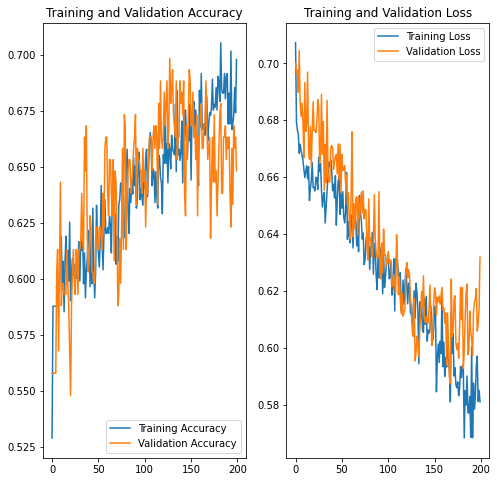

In [49]:
epochs = 200
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [50]:
model.save("./monitor.h5")